<a href="https://colab.research.google.com/github/ujjwalchandurkar11/Deep-Learning/blob/main/Handwritten_digit_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Handwritten digit classification project

In [25]:
from warnings import filterwarnings
filterwarnings('ignore')

# Load MNIST dataset

In [76]:
from keras.datasets import mnist
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

In [77]:
xtrain.shape

(60000, 28, 28)

In [78]:
xtrain

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [79]:
ytrain

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

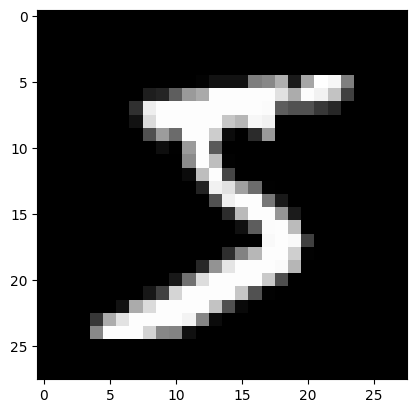

In [80]:
import matplotlib.pyplot as plt
plt.imshow(xtrain[0], cmap='gray')

In [81]:
xtest.shape

(10000, 28, 28)

In [82]:
ytest

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

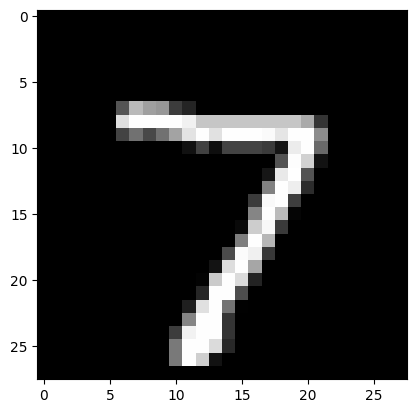

In [83]:
plt.imshow(xtest[0], cmap='gray')

Displaying first 9 images from train data

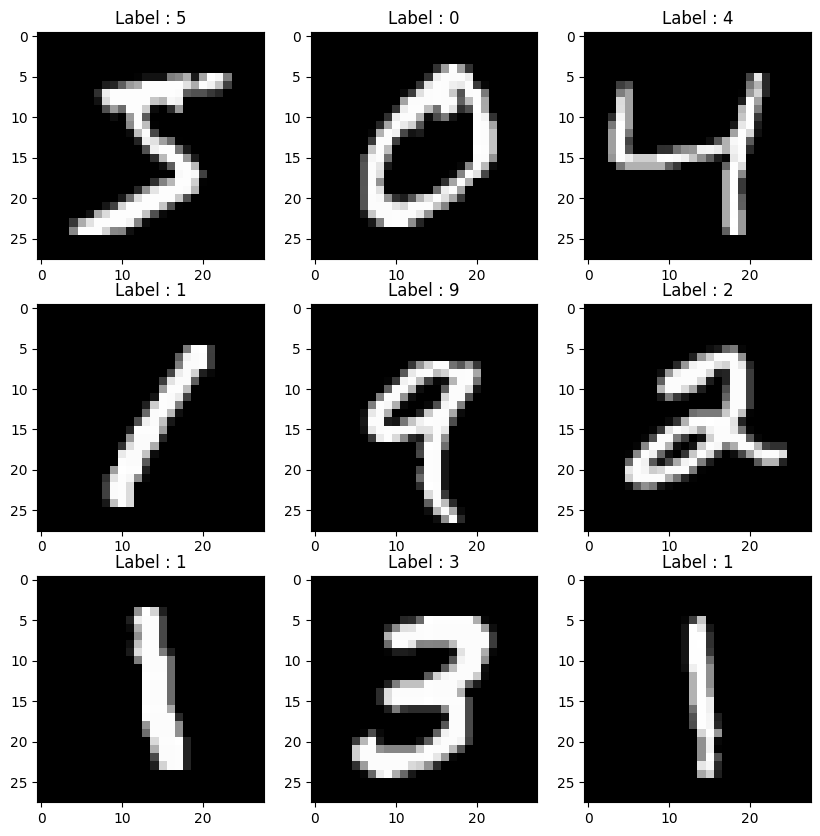

In [84]:
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(xtrain[i], cmap='gray')
    plt.title(f"Label : {ytrain[i]}")

In [85]:
import numpy as np
np.unique(ytrain)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [86]:
len(np.unique(ytrain))

10

This is multiclass classification problem

## Preprocess image data
Pixel value- 0-255

In [87]:
xtrain_scl = xtrain.astype("float32")/255
xtest_scl = xtest.astype("float32")/255

In [88]:
xtrain_scl[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

### OneHot Encode the y features

In [89]:
from keras.utils import to_categorical
ytrain_cat = to_categorical(ytrain)
ytest_cat = to_categorical(ytest)

In [90]:
ytrain[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [91]:
ytrain_cat[0:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [92]:
ytest[0:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [93]:
ytest_cat[0:5]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

In [94]:
xtrain.shape

(60000, 28, 28)

### Build the neural network

Simple Covnet architecture



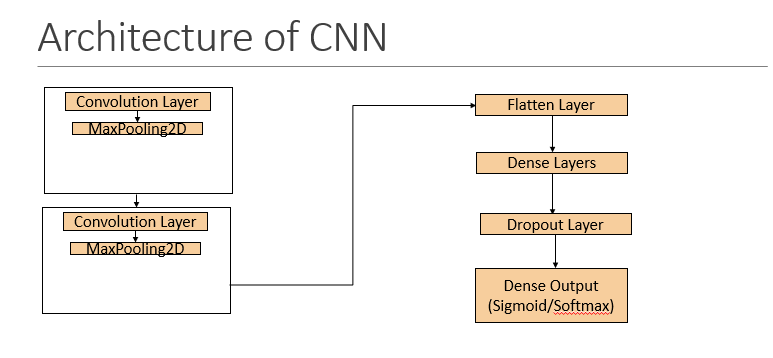

In [95]:
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [96]:
model = Sequential()

# Added Input layer
model.add(Input(shape=(28, 28, 1)))

# Add Convolution Layer 1
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))

# Add Max pooling 1
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add Convolution Layer2
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))

# Add Max pooling 2
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add Flatten Layer
model.add(Flatten())

# Add Dropout Layer
model.add(Dropout(0.5))

# Output layer
model.add(Dense(ytrain_cat.shape[1], activation='softmax'))

In [97]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │          16,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

In [98]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [99]:
hist = model.fit(xtrain_scl, ytrain_cat, epochs=15, validation_split=0.1)

Epoch 1/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8490 - loss: 0.4757 - val_accuracy: 0.9825 - val_loss: 0.0647
Epoch 2/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9733 - loss: 0.0888 - val_accuracy: 0.9865 - val_loss: 0.0464
Epoch 3/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9796 - loss: 0.0693 - val_accuracy: 0.9902 - val_loss: 0.0402
Epoch 4/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9821 - loss: 0.0573 - val_accuracy: 0.9900 - val_loss: 0.0333
Epoch 5/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9840 - loss: 0.0485 - val_accuracy: 0.9900 - val_loss: 0.0332
Epoch 6/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9855 - loss: 0.0432 - val_accuracy: 0.9918 - val_loss: 0.0280
Epoch 7/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9867 - loss: 0.0418 - val_accuracy: 0.9910 - val_loss: 0.0305
Epoch 8/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9877 - loss: 0.0375 - 

### plot the learning curve

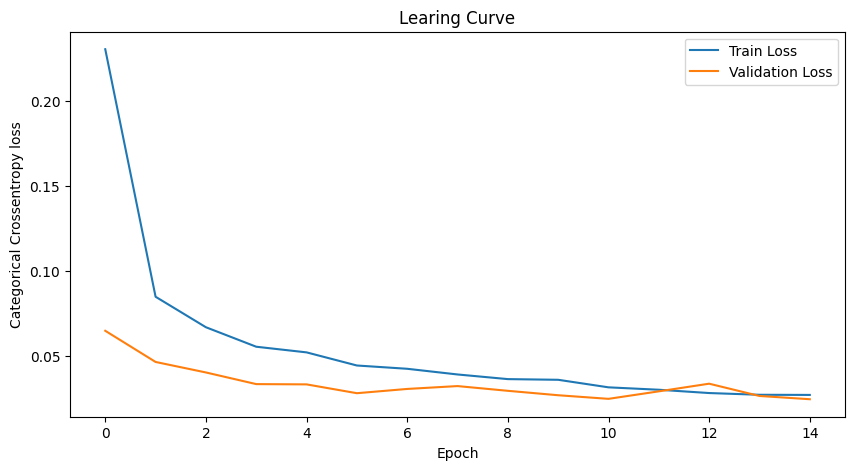

In [100]:
plt.figure(figsize=(10, 5))
plt.plot(hist.history['loss'], label='Train Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.title('Learing Curve')
plt.ylabel('Categorical Crossentropy loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

Evaluate the model in train and test

In [101]:
model.evaluate(xtrain_scl, ytrain_cat)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9976 - loss: 0.0079


[0.009790495969355106, 0.9971333146095276]

In [102]:
model.evaluate(xtest_scl, ytest_cat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9918 - loss: 0.0260


[0.02098521776497364, 0.9937999844551086]

Predict results for train and test

In [103]:
yprob_train = model.predict(xtrain_scl)
yprob_test = model.predict(xtest_scl)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [104]:
yprob_train[0:5]

array([[1.1773812e-11, 6.2704765e-11, 6.2071503e-10, 2.8196950e-03,
        1.3949441e-14, 9.9717975e-01, 2.4607053e-12, 3.2676852e-09,
        6.5813857e-08, 4.9139311e-07],
       [9.9999988e-01, 6.6737134e-18, 1.3971716e-07, 8.5754532e-13,
        5.6180681e-12, 1.5297723e-12, 2.4546567e-08, 1.2081245e-12,
        1.8107610e-09, 5.0541239e-08],
       [5.2546903e-17, 9.3313490e-10, 6.1931077e-10, 1.6696921e-12,
        9.9999964e-01, 1.2806192e-13, 1.3766161e-13, 8.9139526e-08,
        5.0950794e-10, 2.8726822e-07],
       [2.5796759e-08, 9.9997497e-01, 3.6327087e-06, 6.7509491e-11,
        6.1169076e-06, 1.1265938e-09, 1.4289600e-07, 6.8345457e-06,
        8.4338244e-06, 4.4294318e-08],
       [4.4047079e-12, 1.5735740e-10, 1.2039363e-09, 1.1299972e-09,
        4.0204188e-05, 2.7186937e-11, 3.8398877e-14, 3.7920806e-08,
        4.7739627e-06, 9.9995494e-01]], dtype=float32)

In [105]:
yprob_test[0:5]

array([[1.3946302e-10, 1.2715171e-10, 1.0699904e-05, 1.4373531e-07,
        8.7743621e-14, 1.5207895e-12, 1.3016556e-17, 9.9998903e-01,
        1.3181027e-09, 6.9654092e-08],
       [2.8134185e-08, 7.0773289e-09, 9.9999964e-01, 9.2881824e-10,
        2.9102374e-12, 1.4338391e-14, 3.2838085e-07, 1.8645571e-15,
        4.0424903e-09, 4.2327808e-15],
       [2.9670659e-09, 9.9993539e-01, 4.2970885e-07, 1.5230789e-09,
        5.3228261e-05, 1.5566194e-08, 1.4746695e-07, 1.9350819e-06,
        8.8740589e-06, 3.9690875e-08],
       [9.9985683e-01, 1.4001357e-14, 6.4407340e-07, 5.9003608e-10,
        7.2957529e-09, 1.5927153e-08, 1.3999866e-04, 4.3269249e-11,
        1.8110021e-06, 7.2174146e-07],
       [2.2711518e-12, 8.0292603e-13, 7.4008568e-12, 6.7095877e-15,
        9.9998450e-01, 1.0044318e-13, 2.8385525e-12, 2.4809490e-12,
        4.4360468e-10, 1.5460073e-05]], dtype=float32)

In [106]:
import numpy as np
ypred_train = np.argmax(yprob_train, axis=1)
ypred_test = np.argmax(yprob_test, axis=1)

In [107]:
ypred_train[0:5]

array([5, 0, 4, 1, 9])

In [108]:
ytrain[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [109]:
ypred_test[0:5]

array([7, 2, 1, 0, 4])

In [110]:
ytest[0:5]

array([7, 2, 1, 0, 4], dtype=uint8)

### Plot the confusion matrix

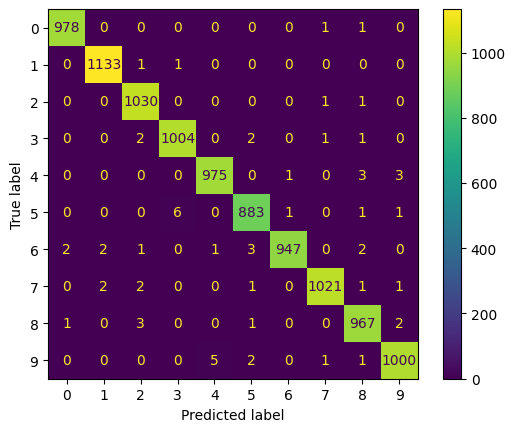

In [111]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(ytest, ypred_test)

In [112]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       1.00      1.00      1.00      1135
           2       0.99      1.00      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       1.00      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



### Save above model for future use

In [113]:
model.save('digit_model.keras')

Load above model

In [115]:
from keras.models import load_model
nn = load_model('/content/digit_model.keras')
nn.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │          16,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 104,480 (408.13 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 69,654 (272.09 KB)

In [117]:
# Loading the image
import cv2
img = cv2.imread('/content/example_img.jpg', cv2.IMREAD_GRAYSCALE)
img

array([[  1,   1,   0,   1,   0,   0,   2,   0,   2,   0,   0,   2,   0,
          0,   2,   1,   1,   0,   0,   0,   3,   0,   0,   1,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   3,   2,   0,   1,   0,   3,   3,   0,   0,
          0,   0,   0,   0,   4,   0,   2,   2,   0,   1,   0,   0,   0,
          0,   0],
       [  1,   2,   1,   1,   0,   0,   4,   0,   0,   0,   0,   0,   2,
          0,   0,   5,   2,   0,   0,   0,   0,   5,   3,   0,   0,   0,
          0,   0],
       [  0,   0,   1,   0,   2,   2,   0,   2,   0,   1,   1,   0,   0,
          1,   0,   0,   0,   6,   0,   2,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   1,   5,   0,  75, 224, 253, 254, 255, 252, 253, 255, 255,
        255, 255, 253, 254, 220, 105,   0,   4,   0,   0,   2,   0,   0,
          0,   0],
       [  2,   0,   0,   3, 221, 253, 255, 255, 255, 255, 255, 255, 253,
        254, 255, 255, 254, 255, 255, 255, 216, 125,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 123, 253, 255, 254, 254, 255, 253, 253, 255,
        255, 252, 253, 255, 255, 255, 254, 255, 254,   0,   1,   0,   0,
          0,   0],
       [  0,   2,   2,   0,   3,   1,   0,   2,   1,   1,   0,   2,   0,
          3,  96, 224, 254, 255, 254, 255, 254, 171,   2,   0,   0,   0,
          0,   0],
       [  1,   0,   2,   0,   0,   0,   0,   0,   0,   1,   0,   0,  95,
        223, 255, 253, 252, 255, 253, 255, 166,  11,   0,   1,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   2,   0,   0,   2,   0,   0, 132, 253,
        253, 255, 255, 255, 255, 165,   8,   4,   0,   0,   1,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   2,   0,   0,   0,  71, 222, 255, 248, 255,
        255, 253, 169,   8,   0,   0,   6,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  1,   0,   3,   1,   0,   3,   3,  69, 237, 255, 255, 254, 254,
        255, 224,  94,   2,   2,   0,   0,   2,   0,   2,   0,   0,   0,
          0,   0],
       [  1,   1,   0,   1,   1,   0,   0, 225, 254, 251, 255, 253, 255,
        255, 249, 255, 219,  96,   2,   0,   1,   0,   2,   0,   0,   0,
          0,   0],
       [  1,   0,   1,   0,   0,   2,   0, 120, 255, 254, 254, 253, 252,
        255, 255, 254, 255, 243, 103,   0,   0,   5,   0,   3,   0,   0,
          0,   0],
       [  0,   1,   0,   0,   2,   0,   1,   0,   1,   1,   0,   5,   3,
        118, 255, 253, 250, 255, 255, 221,  95,   0,   2,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   4,   0,   1,   0,   1,   0,   0,   3,   0,   3,
          0,   0, 121, 255, 255, 252, 255, 248,   0,   0,   1,   0,   0,
          0,   0],
       [  0,   0,   4,   0,   0,   1,   0,   1,   1,   1,   0,   0,   0,
          2,   0,   1,  10, 155, 255, 255, 250,   3,   1,   0,   0,   0,
          0,   0],
       [  1,   0,   0,   0,   2,   0,   1,   0,   0,   0,   2,   2,   0,
          0,   0,   0,   0,   2, 255, 254, 255,   0,   0,   4,   0,   0,
          0,   0],
       [  0,   3,   2,   0,   1,   2,   3,   0,   1,   0,   0,   1,   0,
          0,   3,   2,   2,   0, 254, 255, 254,   2,   2,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   6,   0,   0,   0,   1,   0,   2,   0,   2,   0,
          3,   0,   0,   0,   1, 254, 255, 252,   3,   0,   2,   0,   0,
          0,   0],
       [  4,   0,   2,   0,   0,   3,  75, 221, 223,  96,   0,   2,   0,
          0,   0,   6,   0, 125, 254, 255, 255,   0,   1,   0,   0,   0,
          0,   0],
       [  0,   5,   1,   0,   0,   1, 216, 255, 255, 243,  98,   0,   2,
          2,   0,  72, 224, 255, 255, 255, 166,   0,   4,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   5,   2,   1, 126, 253, 255, 254, 255, 255, 255,
        255, 255, 255, 255, 255, 253, 183,   9,   1,   0,   0,   0,   0,
          0,   0],
       [  3,   0,   3,   0,   2,   0,   3, 120, 255, 253, 255, 254, 254,
        253, 255, 253, 254, 255, 167,   8,   2,   0,   0,   2,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [118]:
img_scl = img.astype('float32')/255

In [119]:
probs = model.predict(np.array([img_scl]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step


In [120]:
probs

array([[4.5564040e-21, 4.3006609e-19, 7.9276626e-15, 1.0000000e+00,
        1.8893219e-17, 4.5228878e-09, 1.6299248e-21, 2.1146017e-16,
        1.6892634e-14, 6.5002620e-13]], dtype=float32)

In [122]:
pred = np.argmax(probs)
pred

3

In [123]:
prob = np.max(probs)
prob

1.0

In [124]:
def predict_number(path):
  img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
  plt.imshow(img, cmap = 'gray')
  plt.show()
  img_scl = img.astype('float32')/255
  probs = model.predict(np.array([img_scl]))
  pred = np.argmax(probs)
  prob = np.max(probs)
  return pred, prob

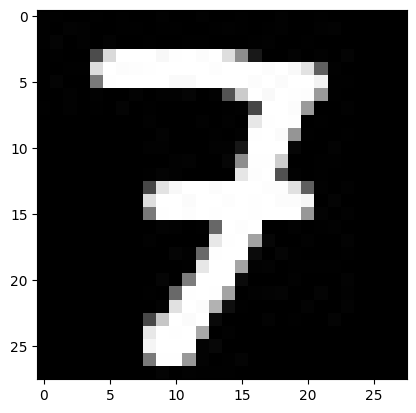

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


(7, 0.9775034)

In [125]:
predict_number('/content/example_img2.jpg')

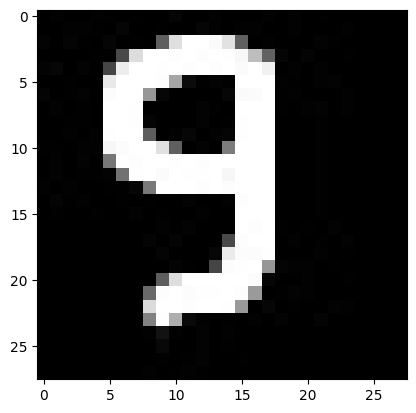

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


(3, 0.50431794)

In [126]:
predict_number('/content/example_img3.jpg')